In [1]:

%pprint
%matplotlib inline
import sys
import os.path as osp

executable_path = sys.executable; scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts')
py_folder = osp.abspath(osp.join(os.pardir, 'py')); ffmpeg_folder = r'C:\ffmpeg\bin'
if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if (ffmpeg_folder not in sys.path): sys.path.insert(1, ffmpeg_folder)
from jobpostlib import (crf, cu, datetime, duration, hau, hc, humanize, ihu, lru, nu, osp, scrfcu, slrcu, ssgdcu, su, t0, time, wsu, speech_engine)
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import matplotlib.dates as mdates

Pretty printing has been turned OFF
======== Neo4j/5.24.2 ========
Utility libraries created in 9 seconds


In [2]:

# Cypher for applications by search type
cypher_str = f'''
    // Count applications by search type
    MATCH (fn:FileNames)
    WHERE fn.search_type IS NOT NULL
    WITH
        fn.search_type AS search_type,
        COUNT(CASE WHEN fn.opportunity_application_email_date IS NOT NULL THEN 1 END) AS successful_count,
        COUNT(CASE WHEN fn.opportunity_application_email_date IS NULL THEN 1 END) AS unsuccessful_count,
        COUNT(fn) AS total_count
    RETURN
        search_type, 
        successful_count, 
        unsuccessful_count,
        CASE WHEN total_count > 0 THEN ROUND((successful_count * 100.0 / total_count) * 10) / 10 ELSE 0 END AS percentage_successful
    ORDER BY
        percentage_successful DESC,
        unsuccessful_count DESC;'''

In [12]:

import pyperclip

row_objs_list = []
with cu.driver.session() as session:
    row_objs_list = session.write_transaction(cu.do_cypher_tx, cypher_str)
assert row_objs_list, "You are not getting any search types"
search_types_df = DataFrame(row_objs_list).set_index('search_type')
mask_series = (search_types_df.percentage_successful > 0.0)
df = search_types_df[mask_series]
pyperclip.copy(df.head(5).to_html())

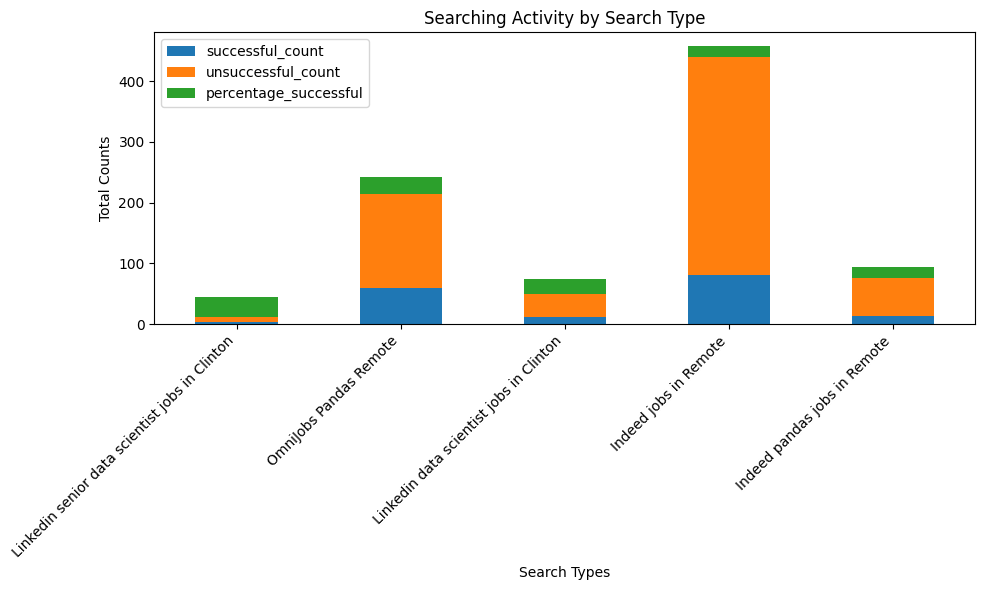

In [17]:

# Plotting the stacked bar chart
mask_series = (search_types_df.percentage_successful > 0.0)
ax = search_types_df[mask_series].head(5).plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Search Types')
ax.set_ylabel('Total Counts')
ax.set_title('Searching Activity by Search Type')

# Rotate and align the tick labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()